## Matplotlib

In [1]:
import matplotlib.pyplot as plt

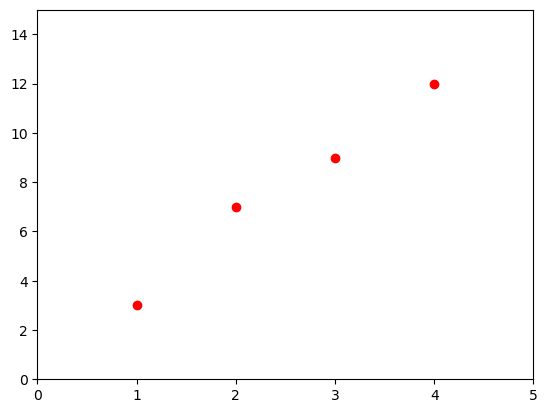

In [3]:
x = [1, 2, 3, 4]
y = [3, 7, 9, 12]
plt.plot(x, y, 'ro') # 'r': 빨간색 / 'o' : 점
plt.axis([0, 5, 0, 15]) # x축의 값 : 0 ~ 5 / y축의 값 : 0 ~ 15
plt.show()

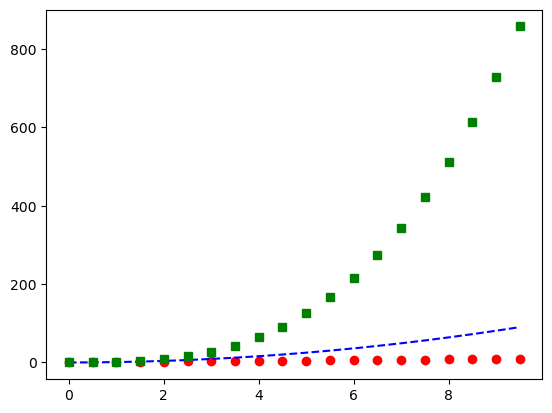

In [4]:
import numpy as np

time = np.arange(0, 10, 0.5)
plt.plot(time, time, 'ro', time, time**2, 'b--', time, time**3, 'gs')
# plt.plot(time, time, 'ro')
# plt.plot(time, time**2, 'b--')
# plt.plot(time, time**3, 'gs')
plt.show()

### 퀴즈2 - 실습1 - 실습2

## Seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


다양한 종류의 palette는 아래 링크 참고

https://seaborn.pydata.org/tutorial/color_palettes.html

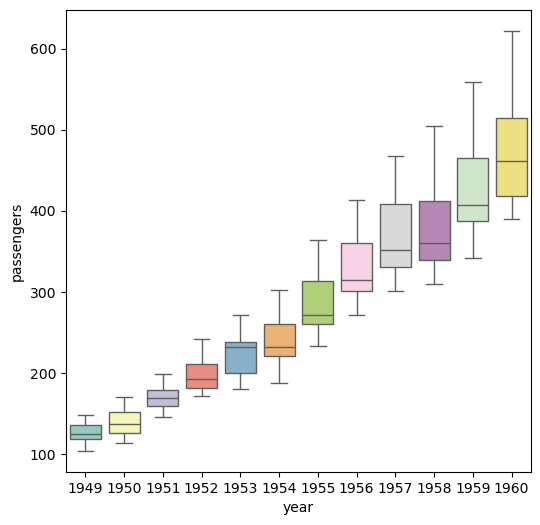

In [20]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=flights, x='year', y='passengers', hue='year', legend=False, palette='Set3')
plt.show()

In [21]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


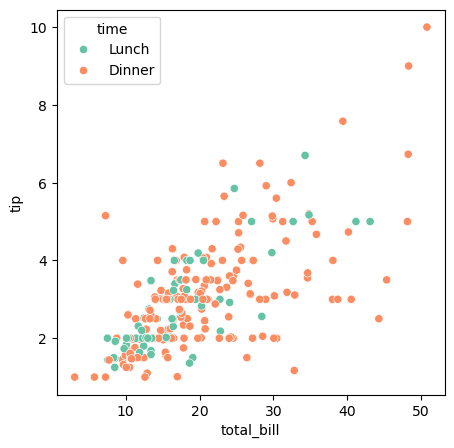

In [23]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", palette="Set2")
plt.show()

### 실습3, 실습4

## 데이터 비교

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


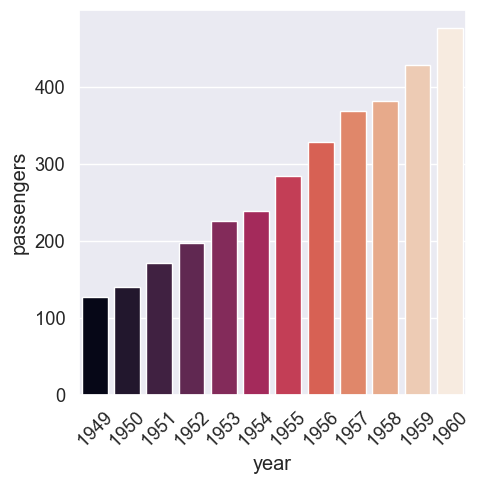

In [3]:
sns.set(font_scale=1.2)

plt.figure(figsize=(5, 5))
sns.barplot(data=flights, x="year", y="passengers", palette="rocket", hue="year", legend=False, errorbar=None)
plt.xticks(rotation=45)
plt.show()

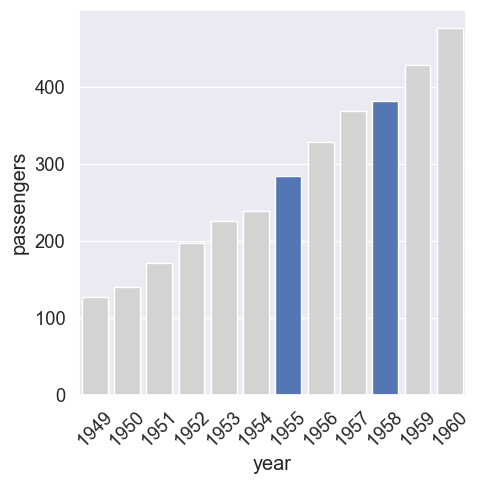

In [4]:
sns.set(font_scale=1.2)

plt.figure(figsize=(5, 5))

# 데이터 내 연도 카테고리 리스트화
flights_years = sorted(list(set(flights['year'])))
# 1955, 1958년만 제외하고 모두 회색으로
color = ['lightgrey' if x not in [1955, 1958] else "#4472C4" for x in flights_years]

sns.barplot(data=flights, x="year", y="passengers", palette=color, hue="year", legend=False, errorbar=('ci', False))
plt.xticks(rotation=45)
plt.show()

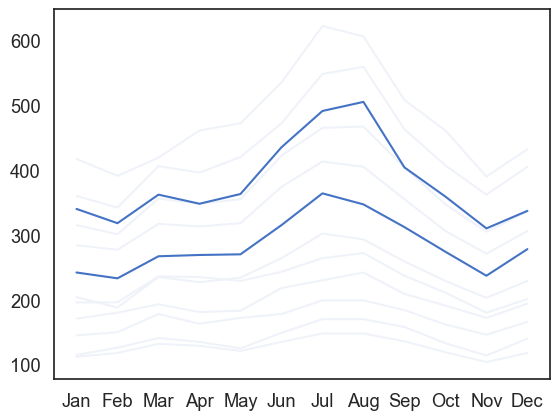

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

for year in flights['year'].unique():
    flights_for_year = flights[flights['year']==year]
    line_color = '#4472C4' if year == 1955 or year == 1958 else '#EFF3F9'
    plt.plot(flights_for_year['month'], flights_for_year['passengers'], color=line_color)

plt.show()

### 퀴즈4, 실습5

## 상관관계 분석

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'키': [158, 163, 170, 183, 180], '몸무게': [49, 52, 60, 80, 83]})
cov = np.cov(df['키'], df['몸무게'])
cov_df = pd.DataFrame({"키": cov[:, 0], "몸무게": cov[:, 1]}, index=["키", "몸무게"])
cov_df

,키,몸무게
키,114.7,164.7
몸무게,164.7,249.7


그러나 164.7 이라는 수치 자체가 큰 지 작은 지를 알기가 어려움. 특히 단위에도 수치가 크게 바뀜.

In [13]:
np.corrcoef(df['키'], df['몸무게'])

array([[1.        , 0.97320116],
       [0.97320116, 1.        ]])

In [12]:
print(np.corrcoef(df['키'], df['몸무게'])[0][1])
print('-'*25)
df2 = pd.DataFrame({'키': [1.58, 1.63, 1.70, 1.83, 1.80], '몸무게': [49, 52, 60, 80, 83]})
print(np.corrcoef(df2['키'], df2['몸무게'])[0][1])

0.9732011625327036
-------------------------
0.9732011625327038


### 퀴즈5, 실습6

## 상관관계 시각화

In [32]:
import pandas as pd
import numpy as np
from sklearn import datasets

dataset = datasets.load_diabetes()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


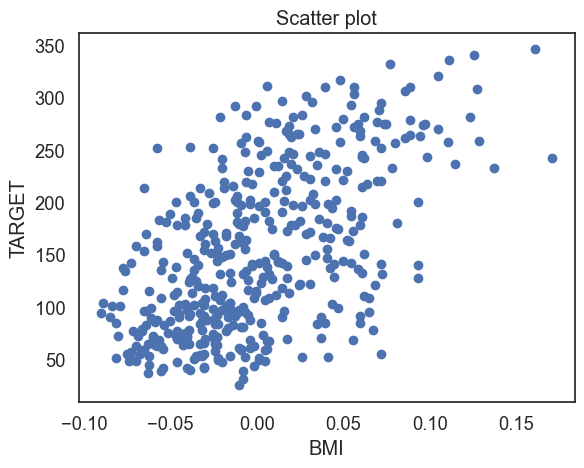

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df['bmi'], df['target'])
plt.title("Scatter plot")
plt.xlabel("BMI")
plt.ylabel("TARGET")
plt.show()

<Figure size 1400x800 with 0 Axes>

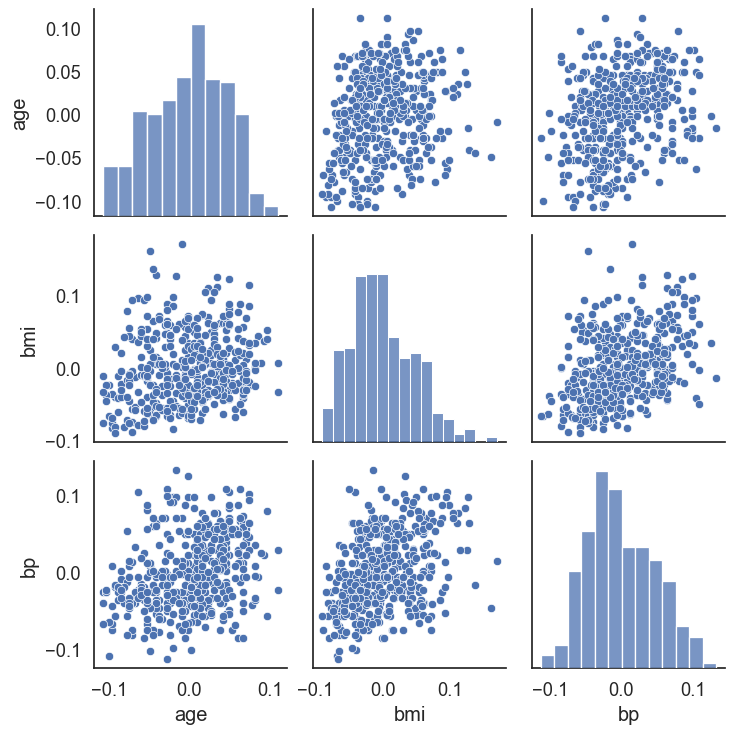

In [34]:
import seaborn as sns

plt.figure(figsize=(14, 8))
fig = sns.pairplot(df[['age', 'bmi', 'bp']])
plt.show()

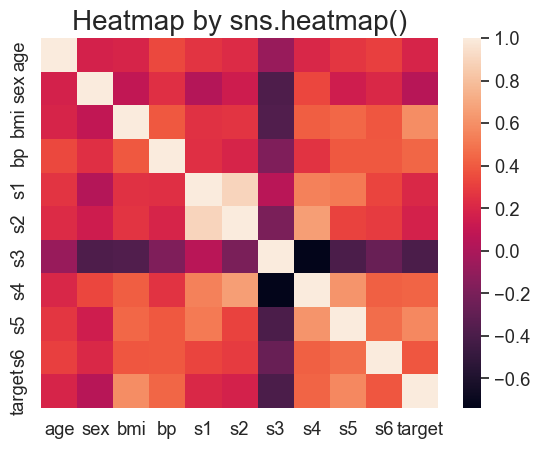

In [35]:
sns.heatmap(df.corr())
plt.title("Heatmap by sns.heatmap()", fontsize=20)
plt.show()

### 퀴즈6, 실습7

## 데이터 스케일링

In [70]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

cancer = load_breast_cancer()
X = cancer.data

print("[Before Data Scaling]")
print(f"minimum : {np.min(X)} / maximum : {np.max(X)}")
print("-"*80)
std = StandardScaler()
std.fit(X)
X_std = std.transform(X)

print("[Standard Data Scaling]")
print(f"minimum : {np.min(X_std)} / maximum : {np.max(X_std)}")
print("-"*80)
mms = MinMaxScaler()
mms.fit(X)
X_minmax = mms.transform(X)

print("[Min-Max Data Scaling]")
print(f"minimum : {np.min(X_minmax)} / maximum : {np.max(X_minmax)}")
print("-"*80)
rbs = RobustScaler()
rbs.fit(X)
X_robust = rbs.transform(X)

print("[Robust Data Scaling]")
print(f"minimum : {np.min(X_robust)} / maximum : {np.max(X_robust)}")

[Before Data Scaling]
minimum : 0.0 / maximum : 4254.0
--------------------------------------------------------------------------------
[Standard Data Scaling]
minimum : -3.1120847879199744 / maximum : 12.072680399588076
--------------------------------------------------------------------------------
[Min-Max Data Scaling]
minimum : 0.0 / maximum : 1.0000000000000002
--------------------------------------------------------------------------------
[Robust Data Scaling]
minimum : -2.284204965662968 / maximum : 18.934528163862478


Text(0.5, 1.0, 'Robust Scaling')

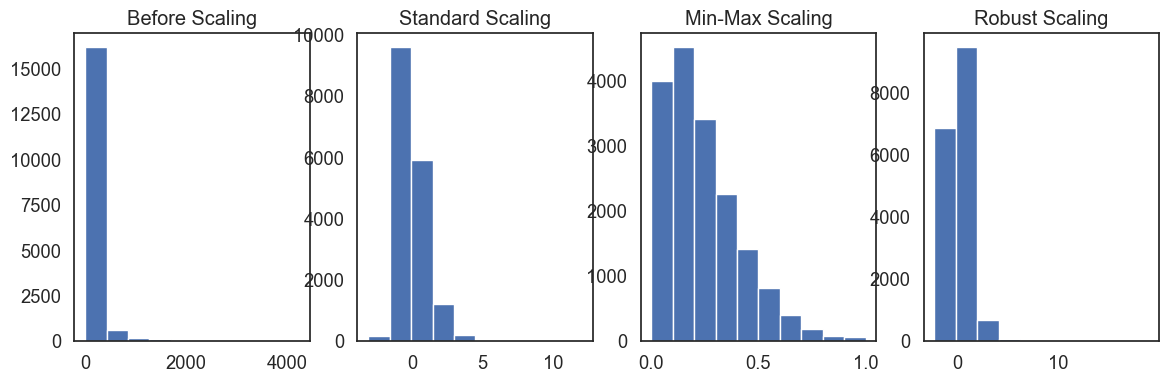

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(14, 4))
ax[0].hist(X.reshape(-1, 1))
ax[0].set_title("Before Scaling")
ax[1].hist(X_std.reshape(-1, 1))
ax[1].set_title("Standard Scaling")
ax[2].hist(X_minmax.reshape(-1, 1))
ax[2].set_title("Min-Max Scaling")
ax[3].hist(X_robust.reshape(-1, 1))
ax[3].set_title("Robust Scaling")

### 실습8

## 데이터 전처리

In [76]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [77]:
titanic = titanic.drop(['deck'], axis=1)
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [78]:
print(titanic['age'][885:890])
titanic['age'] = titanic['age'].interpolate() # 이전값과 이후값의 중간값으로 대체.
print(titanic['age'][885:890])

885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
Name: age, dtype: float64
885    39.0
886    27.0
887    19.0
888    22.5
889    26.0
Name: age, dtype: float64


### 퀴즈와 실습9

## 특성 엔지니어링

In [80]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
titanic['alive_1'] = np.where(titanic['alive']=='yes', 1, 0)
titanic_sub = titanic[['fare', 'alive_1']]
print(titanic_sub.corr())

             fare   alive_1
fare     1.000000  0.257307
alive_1  0.257307  1.000000


In [84]:
titanic['expensive'] = np.where(titanic['fare']>50, 1, 0)
titanic['continent'] = np.where(titanic['embark_town']=="Queenstown", "Oceania", "Europe")

print(titanic[['expensive', 'continent']])

     expensive continent
0            0    Europe
1            1    Europe
2            0    Europe
3            1    Europe
4            0    Europe
..         ...       ...
886          0    Europe
887          0    Europe
888          0    Europe
889          0    Europe
890          0   Oceania

[891 rows x 2 columns]


In [85]:
titanic_sub = titanic[['expensive', 'alive_1']]
print(titanic_sub.corr())

           expensive   alive_1
expensive   1.000000  0.286113
alive_1     0.286113  1.000000
